In [1]:
import torch
import torch.optim as optim
from torchsummary import summary

from utils import get_device, train, test, show_losses, show_images, display_incorrect_images

from model import Model_S9
from dataset import train_loader, test_loader


100%|██████████| 170498071/170498071 [00:12<00:00, 13654714.37it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [2]:
device = get_device()
print(f'Running on device: {device}')

Running on device: cuda


In [4]:
model = Model_S9().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
       BatchNorm2d-7           [-1, 16, 32, 32]              32
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 48, 32, 32]             480
           Conv2d-10           [-1, 16, 32, 32]             784
        Depthwise-11           [-1, 16, 32, 32]               0
             ReLU-12           [-1, 16, 32, 32]               0
      BatchNorm2d-13           [-1, 16, 32, 32]              32
          Dropout-14           [-1, 16,

In [10]:
train_dataset = Cifar10Dataset(root='./data', train=True, download=True, transform=train_transform)
test_dataset = Cifar10Dataset(root='./data', train=False, download=True, transform=test_transform)

data_loader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True)
train_loader = torch.utils.data.DataLoader(train_dataset, **data_loader_args)
test_loader = torch.utils.data.DataLoader(test_dataset, **data_loader_args)

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [11]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

EPOCHS = 30

for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch, train_losses, train_acc)
    test(model, device, test_loader, test_losses, test_acc)

EPOCH: 0


Loss=1.8403726816177368 Batch_id=74 Accuracy=22.59:  19%|█▉        | 75/391 [00:45<00:16, 18.67it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7faa459503a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
Loss=1.806180477142334 Batch_id=75 Accuracy=22.79:  19%|█▉        | 75/391 [00:45<00:16, 18.67it/s]     assert self._parent_pid == os.getpid(), 'can only test a child process'
Loss=1.8195613622665405 Batch_id=76 Accuracy=22.80:  19%|█▉        | 75/391 [00:45<00:16, 18.67it/s]AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7faa459503a0>
Traceback (most re


Test set: Average loss: 1.4183, Accuracy: 4747/10000 (47.47%)

EPOCH: 1


Loss=1.2634475231170654 Batch_id=390 Accuracy=47.71: 100%|██████████| 391/391 [00:22<00:00, 17.53it/s]



Test set: Average loss: 1.2023, Accuracy: 5642/10000 (56.42%)

EPOCH: 2


Loss=1.2453808784484863 Batch_id=390 Accuracy=53.68: 100%|██████████| 391/391 [00:22<00:00, 17.45it/s]



Test set: Average loss: 1.0650, Accuracy: 6140/10000 (61.40%)

EPOCH: 3


Loss=1.2049487829208374 Batch_id=390 Accuracy=57.74: 100%|██████████| 391/391 [00:22<00:00, 17.33it/s]



Test set: Average loss: 1.0078, Accuracy: 6424/10000 (64.24%)

EPOCH: 4


Loss=1.0220457315444946 Batch_id=390 Accuracy=60.74: 100%|██████████| 391/391 [00:22<00:00, 17.11it/s]



Test set: Average loss: 0.8906, Accuracy: 6843/10000 (68.43%)

EPOCH: 5


Loss=0.9776277542114258 Batch_id=390 Accuracy=63.28: 100%|██████████| 391/391 [00:22<00:00, 17.52it/s]



Test set: Average loss: 0.9171, Accuracy: 6774/10000 (67.74%)

EPOCH: 6


Loss=0.7793363332748413 Batch_id=390 Accuracy=65.07: 100%|██████████| 391/391 [00:22<00:00, 17.40it/s]



Test set: Average loss: 0.8029, Accuracy: 7156/10000 (71.56%)

EPOCH: 7


Loss=1.22385573387146 Batch_id=390 Accuracy=66.64: 100%|██████████| 391/391 [00:22<00:00, 17.22it/s]



Test set: Average loss: 0.7497, Accuracy: 7393/10000 (73.93%)

EPOCH: 8


Loss=0.852835476398468 Batch_id=390 Accuracy=68.31: 100%|██████████| 391/391 [00:22<00:00, 17.16it/s]



Test set: Average loss: 0.7196, Accuracy: 7500/10000 (75.00%)

EPOCH: 9


Loss=1.2133758068084717 Batch_id=390 Accuracy=69.54: 100%|██████████| 391/391 [00:22<00:00, 17.21it/s]



Test set: Average loss: 0.6785, Accuracy: 7593/10000 (75.93%)

EPOCH: 10


Loss=0.8350839614868164 Batch_id=390 Accuracy=70.49: 100%|██████████| 391/391 [00:22<00:00, 17.04it/s]



Test set: Average loss: 0.6556, Accuracy: 7757/10000 (77.57%)

EPOCH: 11


Loss=0.7406206727027893 Batch_id=390 Accuracy=71.71: 100%|██████████| 391/391 [00:22<00:00, 17.06it/s]



Test set: Average loss: 0.6434, Accuracy: 7766/10000 (77.66%)

EPOCH: 12


Loss=0.8111603856086731 Batch_id=390 Accuracy=72.29: 100%|██████████| 391/391 [00:22<00:00, 17.20it/s]



Test set: Average loss: 0.6349, Accuracy: 7819/10000 (78.19%)

EPOCH: 13


Loss=0.8326423764228821 Batch_id=390 Accuracy=72.96: 100%|██████████| 391/391 [00:22<00:00, 17.12it/s]



Test set: Average loss: 0.5967, Accuracy: 7965/10000 (79.65%)

EPOCH: 14


Loss=0.6083917021751404 Batch_id=390 Accuracy=73.71: 100%|██████████| 391/391 [00:22<00:00, 17.40it/s]



Test set: Average loss: 0.5857, Accuracy: 7974/10000 (79.74%)

EPOCH: 15


Loss=0.8028954267501831 Batch_id=390 Accuracy=74.59: 100%|██████████| 391/391 [00:22<00:00, 17.20it/s]



Test set: Average loss: 0.5727, Accuracy: 8070/10000 (80.70%)

EPOCH: 16


Loss=0.5969932675361633 Batch_id=390 Accuracy=75.05: 100%|██████████| 391/391 [00:22<00:00, 17.14it/s]



Test set: Average loss: 0.5371, Accuracy: 8160/10000 (81.60%)

EPOCH: 17


Loss=0.8888594508171082 Batch_id=390 Accuracy=75.63: 100%|██████████| 391/391 [00:22<00:00, 17.20it/s]



Test set: Average loss: 0.5457, Accuracy: 8143/10000 (81.43%)

EPOCH: 18


Loss=0.6081278324127197 Batch_id=390 Accuracy=75.95: 100%|██████████| 391/391 [00:22<00:00, 17.11it/s]



Test set: Average loss: 0.5357, Accuracy: 8146/10000 (81.46%)

EPOCH: 19


Loss=0.9422087669372559 Batch_id=390 Accuracy=76.18: 100%|██████████| 391/391 [00:22<00:00, 17.25it/s]



Test set: Average loss: 0.5132, Accuracy: 8265/10000 (82.65%)

EPOCH: 20


Loss=0.6690810918807983 Batch_id=390 Accuracy=76.85: 100%|██████████| 391/391 [00:22<00:00, 17.24it/s]



Test set: Average loss: 0.5587, Accuracy: 8095/10000 (80.95%)

EPOCH: 21


Loss=0.5965104699134827 Batch_id=390 Accuracy=77.06: 100%|██████████| 391/391 [00:22<00:00, 17.05it/s]



Test set: Average loss: 0.5011, Accuracy: 8274/10000 (82.74%)

EPOCH: 22


Loss=0.7396020293235779 Batch_id=390 Accuracy=77.37: 100%|██████████| 391/391 [00:22<00:00, 17.38it/s]



Test set: Average loss: 0.4922, Accuracy: 8332/10000 (83.32%)

EPOCH: 23


Loss=0.8687537908554077 Batch_id=390 Accuracy=77.88: 100%|██████████| 391/391 [00:22<00:00, 17.11it/s]



Test set: Average loss: 0.4914, Accuracy: 8315/10000 (83.15%)

EPOCH: 24


Loss=0.7602582573890686 Batch_id=390 Accuracy=78.26: 100%|██████████| 391/391 [00:22<00:00, 17.11it/s]



Test set: Average loss: 0.4893, Accuracy: 8357/10000 (83.57%)

EPOCH: 25


Loss=0.6929641366004944 Batch_id=390 Accuracy=78.51: 100%|██████████| 391/391 [00:22<00:00, 17.06it/s]



Test set: Average loss: 0.4794, Accuracy: 8341/10000 (83.41%)

EPOCH: 26


Loss=0.4434071183204651 Batch_id=390 Accuracy=78.45: 100%|██████████| 391/391 [00:22<00:00, 17.15it/s]



Test set: Average loss: 0.4737, Accuracy: 8406/10000 (84.06%)

EPOCH: 27


Loss=0.46511706709861755 Batch_id=390 Accuracy=79.02: 100%|██████████| 391/391 [00:22<00:00, 17.11it/s]



Test set: Average loss: 0.4600, Accuracy: 8427/10000 (84.27%)

EPOCH: 28


Loss=0.6233693361282349 Batch_id=390 Accuracy=79.31: 100%|██████████| 391/391 [00:22<00:00, 17.20it/s]



Test set: Average loss: 0.4532, Accuracy: 8461/10000 (84.61%)

EPOCH: 29


Loss=0.4617782533168793 Batch_id=390 Accuracy=79.43: 100%|██████████| 391/391 [00:23<00:00, 16.96it/s]



Test set: Average loss: 0.4442, Accuracy: 8507/10000 (85.07%)



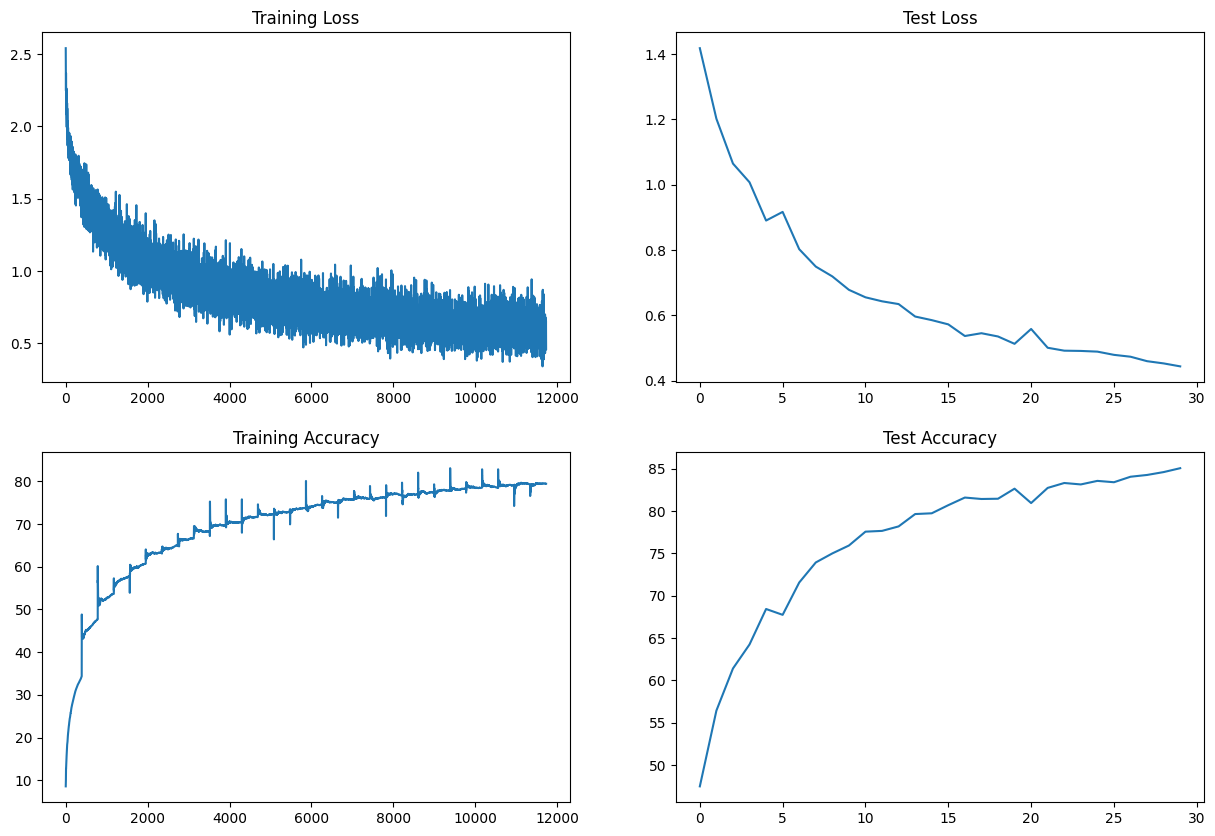

In [12]:
cpu_train_losses = [x.cpu().item() for x in train_losses]
show_losses(cpu_train_losses, train_acc, test_losses, test_acc)


In [13]:
wrong_prediction_list = []

model.eval()

for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)

    pred = outputs.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    match = pred.eq(labels.view_as(pred)).to('cpu').numpy()

    for j,i in enumerate(match):
        if i == False:
            wrong_prediction_list.append((images[j], pred[j].item(), labels[j].item()))



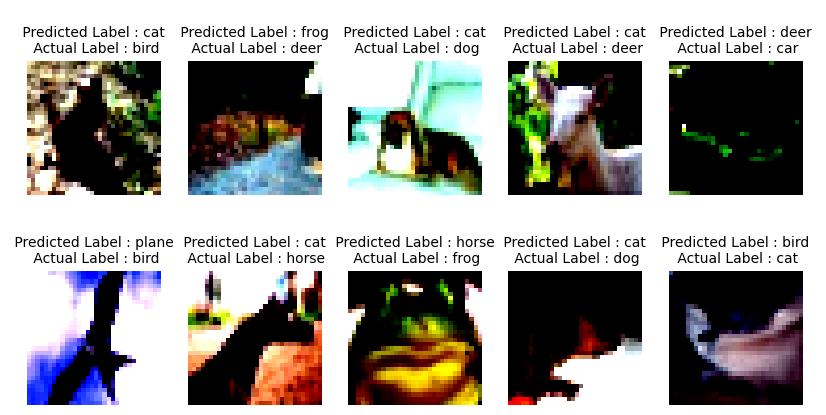

In [14]:
display_incorrect_images(wrong_prediction_list, 10)